In [2]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from datetime import datetime
import data_processing as dp

In [2]:
bike_weather_data = dp.read_and_connect_data(city_name = 'boston', start = datetime(2023, 1, 1), end = datetime(2023, 1, 31))
bike_weather_data = dp.feature_engineering(bike_weather_data)
pca_of_bike_weather_data = dp.apply_pca(bike_weather_data)

In [3]:
iso_forest = IsolationForest(contamination=0.005, n_estimators=500, max_samples=0.6, max_features=0.9) 
bike_weather_data['anomaly'] = iso_forest.fit_predict(pca_of_bike_weather_data)

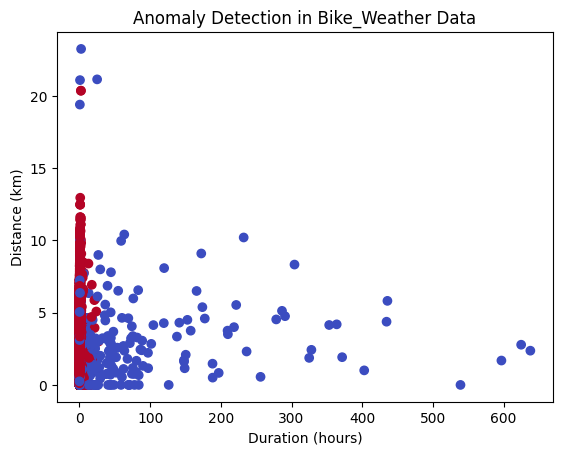

    tripduration  distance  user_type_encoded     speed  temp  wspd  prcp  \
3           1065  0.585427                  0  1.978907  11.1  13.0   1.2   
7           1693  0.000000                  0  0.000000  11.1  13.0   1.2   
8           1689  0.000000                  0  0.000000  11.1  13.0   1.2   
9           1615  0.000000                  0  0.000000  11.1  13.0   1.2   
32          8338  1.995237                  0  0.861460  11.1  11.2   0.3   

    coco  start_hour  start_dayofweek  start_month  end_hour  end_dayofweek  \
3    7.0           0                6            1         0              6   
7    7.0           0                6            1         0              6   
8    7.0           0                6            1         0              6   
9    7.0           0                6            1         0              6   
32   7.0           0                6            1         2              6   

    end_month  anomaly  
3           1       -1  
7           

In [4]:
# Visualize the anomalies (1 = normal, -1 = anomaly)
plt.scatter(bike_weather_data['tripduration'] / 3600, bike_weather_data['distance'], c=bike_weather_data['anomaly'], cmap='coolwarm')

# plt.xlim(0, 50)

plt.xlabel('Duration (hours)')
plt.ylabel('Distance (km)')
plt.title('Anomaly Detection in Bike_Weather Data')
plt.show()

# Print detected anomalies
anomalies = bike_weather_data[bike_weather_data['anomaly'] == -1]
print(anomalies.head())

In [5]:
anomalies.shape

(702, 15)

In [6]:
print(anomalies['coco'].mean())
print(bike_weather_data[bike_weather_data['anomaly'] == 1]['coco'].mean())

5.767806267806268
4.0690213265729955
